In [9]:
import numpy as np
from PIL import Image
from numpy.linalg import inv

import matplotlib
matplotlib.use('qtagg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import ginput
from matplotlib.backend_bases import MouseButton

In [10]:
img = np.asarray(Image.open('newyork3.jpg'))

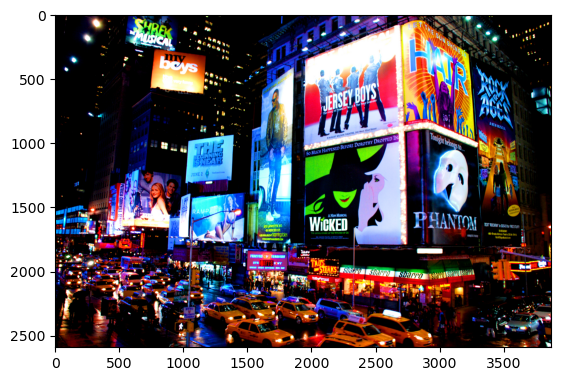

C:\Users\dhruv\AppData\Local\Temp\ipykernel_35852\3874220725.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.ginput(4,timeout=30, show_clicks=True, mouse_add=MouseButton.LEFT, mouse_pop=MouseButton.RIGHT, mouse_stop=MouseButton.MIDDLE)


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [11]:
plt.imshow(img)
plt.show()

plt.ginput(4,timeout=30, show_clicks=True, mouse_add=MouseButton.LEFT, mouse_pop=MouseButton.RIGHT, mouse_stop=MouseButton.MIDDLE)